In [99]:
"""
Null Hypothesis : Pay does not increase in 2015
Alternate Hypothesis: It increases
Technique : Two sample T - test
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import seaborn as sns
from scipy import stats
from scipy.stats import distributions as dists 

payroll = pd.read_csv("processed_data.csv")

c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
def outlier_range(x):
    x = np.array(x)
    upper_q = np.percentile(x, 75)
    lower_q = np.percentile(x, 25)
    iqr = (upper_q - lower_q) * 1.5
    acceptable_range = (lower_q - iqr, upper_q + iqr)
    return acceptable_range

In [120]:
def twosamplettest(payroll,year1, year2, attribute):
    payroll = payroll[payroll.employment_type == 'Full Time']
    payroll_y1 = payroll[payroll.year ==year1]
    payroll_y2 = payroll[payroll.year ==year2]
    payroll_y1 = payroll_y1[payroll_y1[attribute] > 0]
    payroll_y2 = payroll_y2[payroll_y2[attribute] > 0]
    
    payroll_y3 = payroll[payroll.year ==2015]
    payroll_y3 = payroll_y3[payroll_y3[attribute] > 0]
    clean_y3 = payroll_y3[attribute].values

    #Assume Normality as per CLT - Pre-reqisite of Paired T test
    
    clean_y1 = payroll_y1[attribute].values
    outlier = outlier_range(clean_y1)
    index = []
    for i in range(len(clean_y1)):
        if clean_y1[i] < outlier[0] and clean_y1[i] > outlier[1]:
            index.append(i)
    clean_y1 = np.delete(clean_y1,index)
    
    clean_y2 = payroll_y2[attribute].values
    outlier = outlier_range(clean_y2)
    index = []
    for i in range(len(clean_y2)):
        if clean_y2[i] < outlier[0] and clean_y2[i] > outlier[1]:
            index.append(i)
    clean_y2 = np.delete(clean_y2,index)
    print(len(clean_y1), len(clean_y2))
    
    #Population Statistics
    payroll_y1_pop_mean = clean_y1.mean() #Population Mean - True Mean
    payroll_y1_std = statistics.stdev(clean_y1)
    
    payroll_y2_pop_mean = clean_y2.mean()
    payroll_y2_std = statistics.stdev(clean_y2)

    df1 = len(clean_y1) + len(clean_y2)-2 #Degree of Freedom

    t_denom_14_15 = math.sqrt(((payroll_y1_std**2)/len(clean_y1))+((payroll_y2_std**2)/len(clean_y2)))
    t_14_15 = (payroll_y1_pop_mean - payroll_y2_pop_mean)/t_denom_14_15
    print("T-statsistic = ", t_14_15)

    tcritical = dists.t.ppf(1-(0.05)/2, df1) 
    print("T-Critical(Upper-tail) = ",tcritical)
    tcrit= stats.ttest_ind(clean_y1,clean_y2)
    print("p-value = ",tcrit)
    if(t_14_15 > tcritical):
        print("H0 Rejected")
    else:
        print("H0 Accepted")
            
   
    #Plotting the graph
    plt.figure(figsize=(6,5))
#     payroll_y1.insert(0, 'ID', range(0, 0 + len(payroll_y1)))
#     payroll_y2.insert(0, 'ID', range(0, 0 + len(payroll_y2)))
    sns.distplot(clean_y1,color='red')
    sns.distplot(clean_y2, color ='blue')
    sns.distplot(clean_y3, color ='yellow')
#     sns.distplot(payroll_y1['ID'], payroll_y1[attribute],label = year1)
#     sns.distplot(payroll_y2['ID'], payroll_y2[attribute],label = year2)
    plt.legend(labels = [year1,year2,2015])
    plt.show()


c:\users\sweta\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


47027 47262
T-statsistic =  -15.4686984025
T-Critical(Upper-tail) =  1.95998914497
p-value =  Ttest_indResult(statistic=-15.465392288431364, pvalue=6.9210732298435475e-54)
H0 Accepted


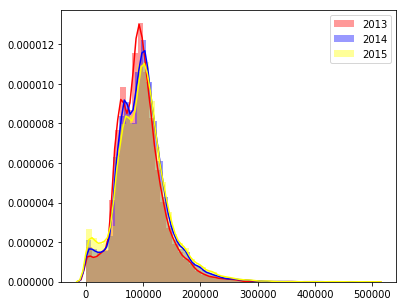

In [121]:
payroll = pd.read_csv("processed_data.csv")
twosamplettest(payroll,2013, 2014, 'total_payments')

47262 48444
T-statsistic =  -2.63777218549
T-Critical(Upper-tail) =  1.95998877244
p-value =  Ttest_indResult(statistic=-2.6354487026558968, pvalue=0.0084039668856912778)
H0 Accepted


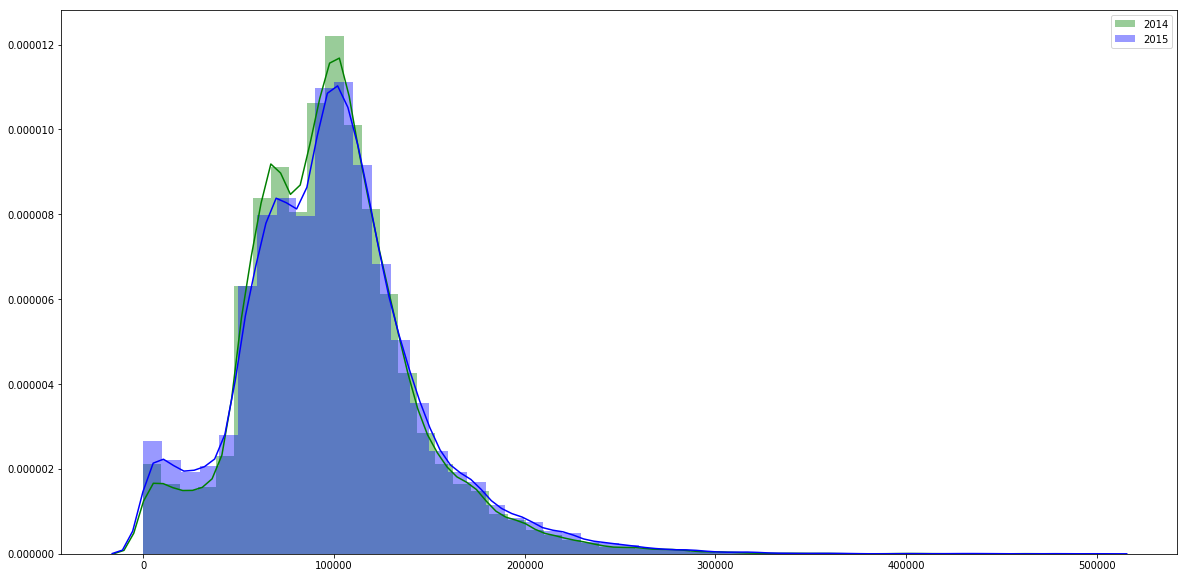

In [103]:
twosamplettest(payroll,2014, 2015, 'total_payments')

36865 36683
T-statsistic =  -13.0337799756
T-Critical(Upper-tail) =  1.95999624067
p-value =  Ttest_indResult(statistic=-13.03390103735787, pvalue=8.6666725798458185e-39)
H0 Accepted


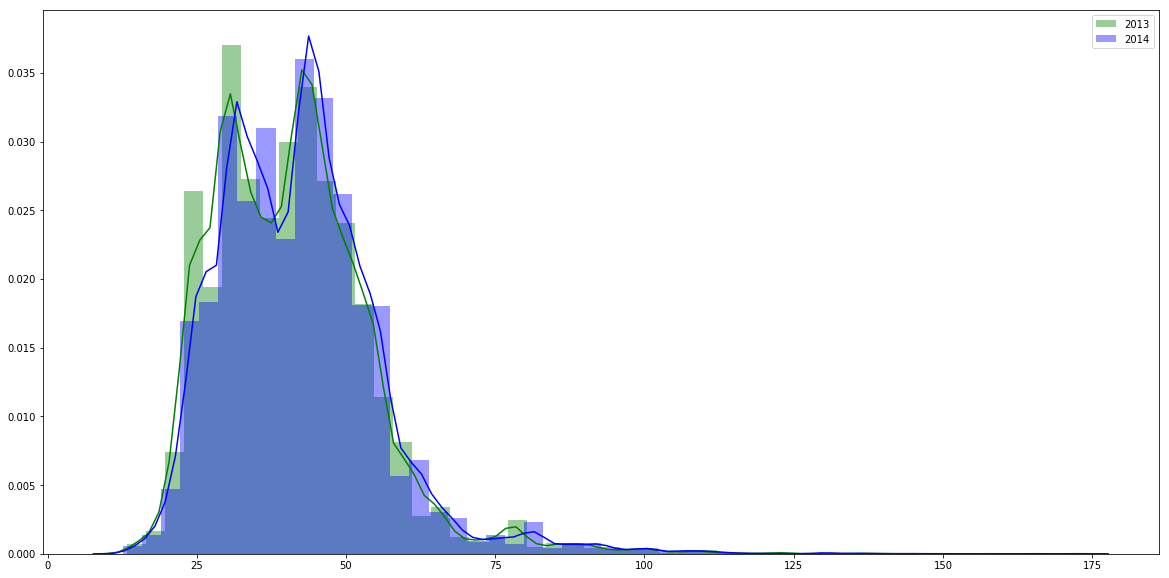

In [104]:
twosamplettest(payroll,2013, 2014, 'hourly_or_event_rate')

36683 48439
T-statsistic =  -6.54682254715
T-Critical(Upper-tail) =  1.95999185466
p-value =  Ttest_indResult(statistic=-6.506540104453622, pvalue=7.7326145633666811e-11)
H0 Accepted


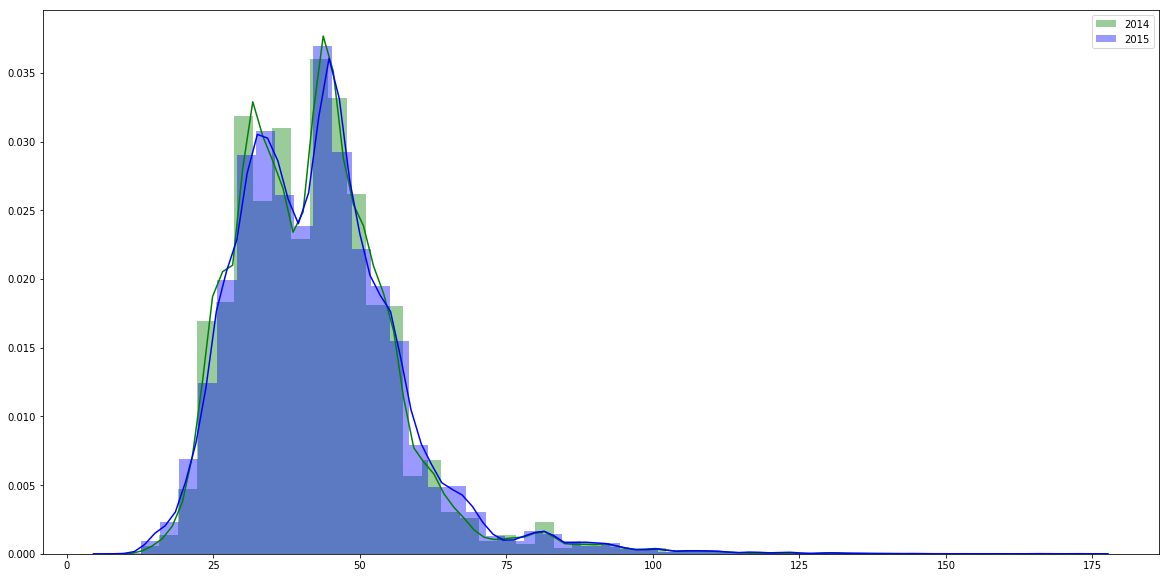

In [105]:
twosamplettest(payroll,2014, 2015, 'hourly_or_event_rate')

In [98]:
def pairedT_test(payroll,year1, year2, attribute):
    payroll_y1 = payroll[payroll.year ==year1]
    payroll_y2 = payroll[payroll.year ==year2]
    
    #Data Pre-processing
    payroll_y1 = payroll_y1[payroll_y1[attribute] != 0]
    payroll_y2 = payroll_y2[payroll_y2[attribute] != 0]
    
    clean_y1 = payroll_y1[attribute].values
    index = []
    for i in range(len(clean_y1)):
        if clean_y1[i] < -45098.666250000002 and clean_y1[i] > 209266.00375:
            index.append(i)
    clean_y1 = np.delete(clean_y1,index)
    
    clean_y2 = payroll_y2[attribute].values
    index = []
    for i in range(len(clean_y2)):
        if clean_y2[i] < -45098.666250000002 and clean_y2[i] > 209266.00375:
            index.append(i)
    clean_y2 = np.delete(clean_y2,index)
#     print(len(clean_y1),len(clean_y2))
    
    #find difference
    diff =[]
    m = min((len(clean_y1),len(clean_y2)))
    for i in range(min(len(clean_y1),len(clean_y2))):
        diff.append(abs(clean_y1[i]-clean_y2[i]))
    diff = np.array(diff)
    avg = np.mean(diff)
    std = np.std(diff)
#     print(std)
    pairedt = (avg*math.sqrt(len(diff)))/std
    print("Paired T-statistic = ", pairedt)
    tcritical = dists.t.ppf(1-(0.05)/2, len(diff)-1) 
    print("T-Critical = ",tcritical)
    print(len(clean_y1[:m]) == len(clean_y2[:m]))
    print("Scipy Results = ", stats.ttest_rel(clean_y1[:m],clean_y2[:m]))
    if pairedt > tcritical:
        print("H0 : Pay did not increase from 2014 to 2015, H0 Accepted.")
    else:
        print("H1 : Pay increases from 2014 to 2015, H0 Rejected. ")
    

In [23]:
pairedT_test(payroll,2014, 2015, 'total_payments')

Paired T-statistic =  271.950551236
T-Critical =  1.96000564367
True
Scipy Results =  Ttest_relResult(statistic=-9.0371747733609098, pvalue=1.65664019363063e-19)
H0 : Pay did not increase from 2014 to 2015, H0 Accepted.


In [10]:
payroll[payroll['year'] == 2015].shape

(59767, 35)

In [11]:
payroll[payroll['year'] == 2016].shape

(110914, 35)

T-statsistic =  35.5292349717
T-Critical(Upper-tail) =  1.64486989245
p-value =  Ttest_indResult(statistic=83.081314309639538, pvalue=0.0)
Since  35.5292349717  >  1.64486989245 , We reject the Null Hypothesis and accept the alternate hypothesis which says that the  overtime_pay  increases in  2016 (as compared to 2015 ).


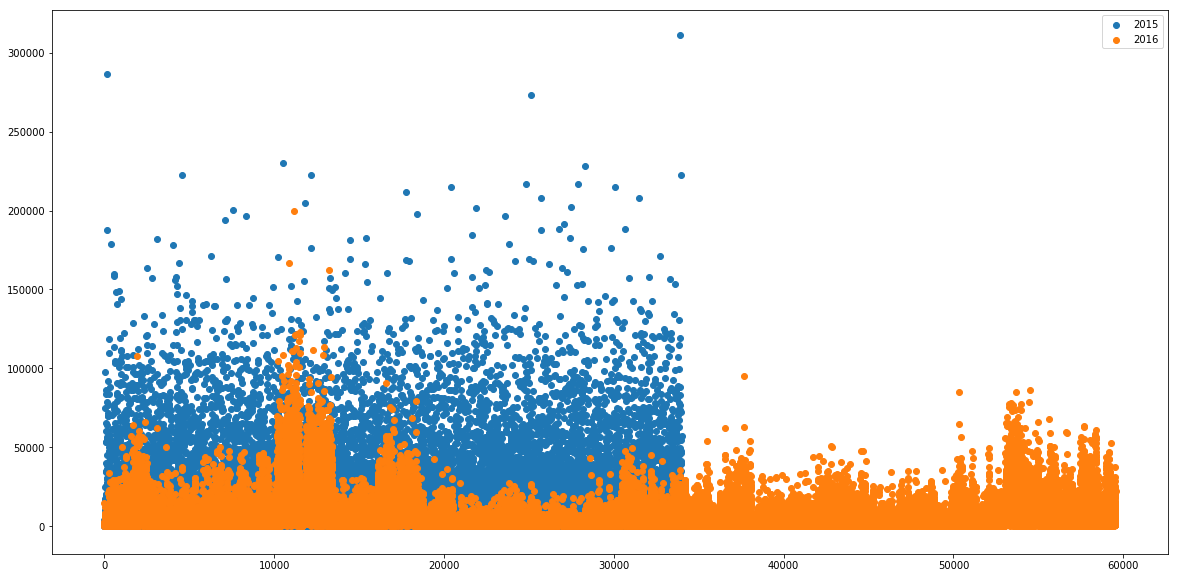

In [18]:
twosamplettest(payroll,2015, 2016, 'overtime_pay')